In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from skimage.segmentation import flood_fill
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_local

In [2]:
def box(height, width):
    arr = np.zeros((height, width), dtype=np.uint8)
    # walls top, bottom, left, right = 1
    arr[0] = arr[-1] = arr[..., 0] = arr[..., -1] = 1
    # start and end locations = 2
    arr[0, 1] = arr[-1, -2] = 2
    return arr

b = box(6, 6)
b

array([[1, 2, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 2, 1]], dtype=uint8)

In [3]:
palette = mpl.cm.inferno.resampled(3).colors
labels = ["0: unfilled", "1: wall", "2: passage"]

def show(arr):
    plt.figure(figsize=(9, 9))
    im = plt.imshow(palette[arr])
    # create a legend on the side
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(palette, labels)]
    plt.legend(handles=patches, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
    plt.show()

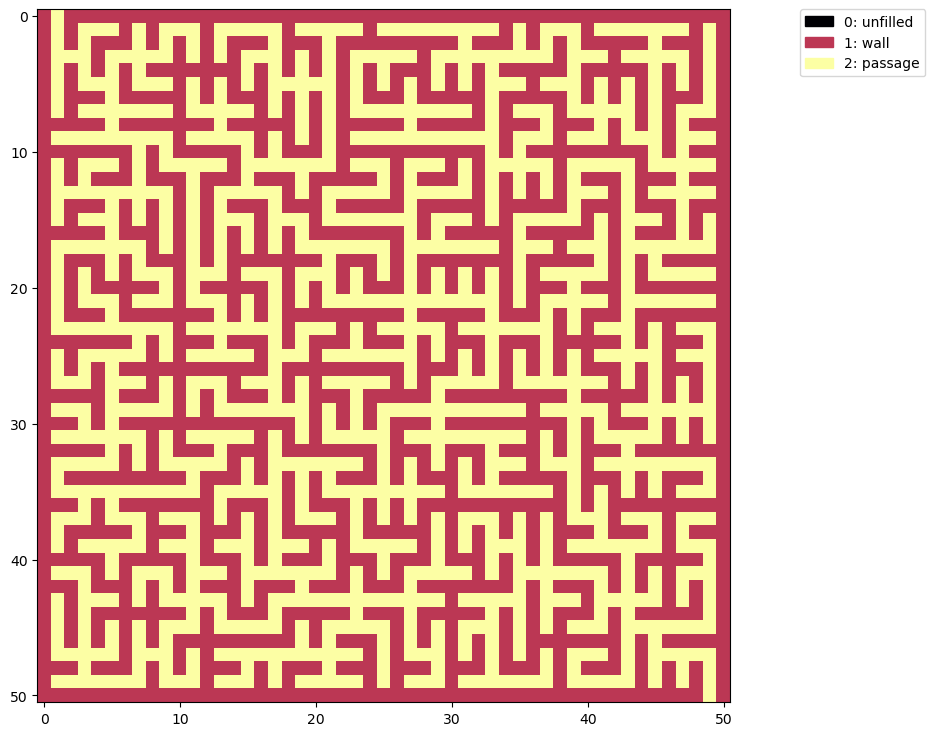

In [29]:
neighbors = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]], dtype=np.uint8)

def maze(arr):
    unfilled = np.swapaxes(np.where(arr == 0), 0, 1)
    np.random.shuffle(unfilled)

    start = tuple(coord[0] for coord in np.where(arr == 2))
    arr = np.copy(arr)
    arr[arr == 2] = 0

    for lc in unfilled:
        lc = tuple(lc)

        y, x = lc
        # protect dead-ends from becoming walls
        if np.sum(neighbors * arr[y-1:y+2, x-1:x+2]) > 2:
            continue

        arr[lc] = 1
        t = flood_fill(arr, start, 1, connectivity=1)        
        if np.any(t == 0):
            arr[lc] = 0

    arr[arr == 0] = 2
    return arr
a = box(51, 51)
a[::2, ::2] = 1  # walls on even (y, x) values
a[1::2, 1::2] = 2

m = maze(a)
t = flood_fill(m, (0, 0), 0)
show(m)


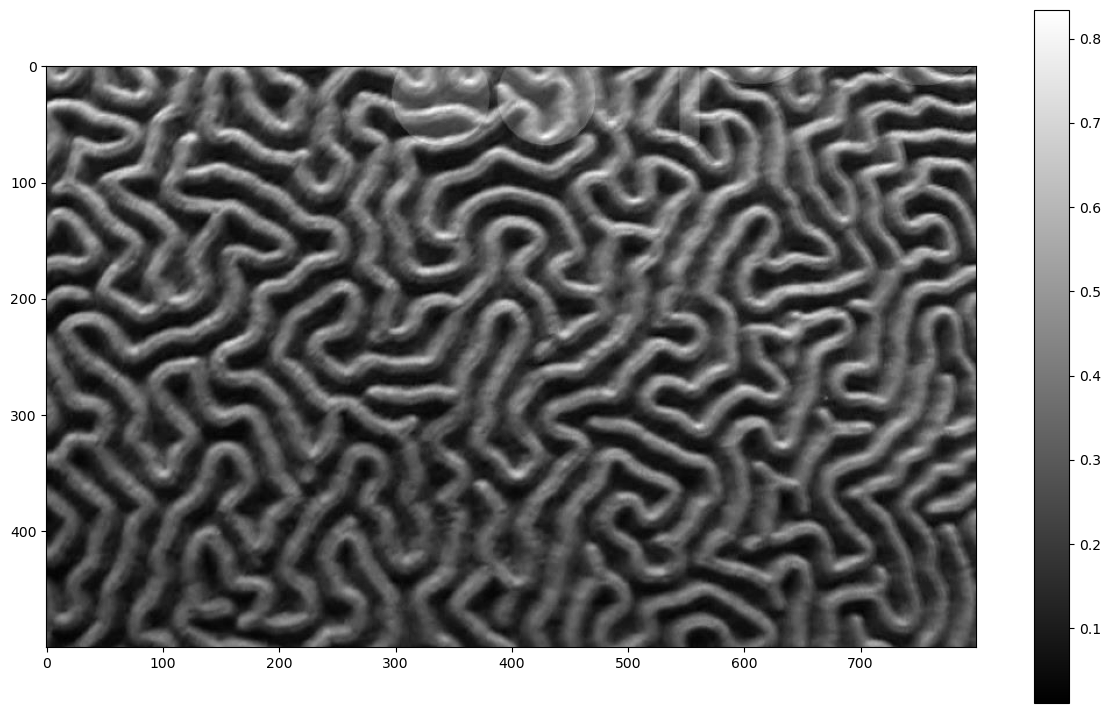

In [10]:
brain = imread('brain-coral.jpg')
crop_brain = rgb2gray(brain[-500:,200:1000])
plt.figure(figsize=(15, 9))
im = plt.imshow(crop_brain, plt.cm.gray)
cb = plt.colorbar()

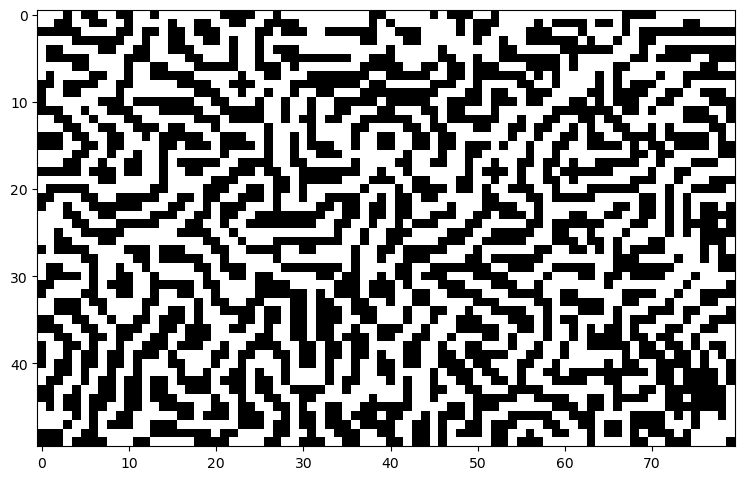

In [11]:
small_brain = resize(crop_brain, (50, 80))
binary_brain = small_brain > threshold_local(small_brain, 15, 'mean')
plt.figure(figsize=(9, 9))
im = plt.imshow(binary_brain, plt.cm.gray)

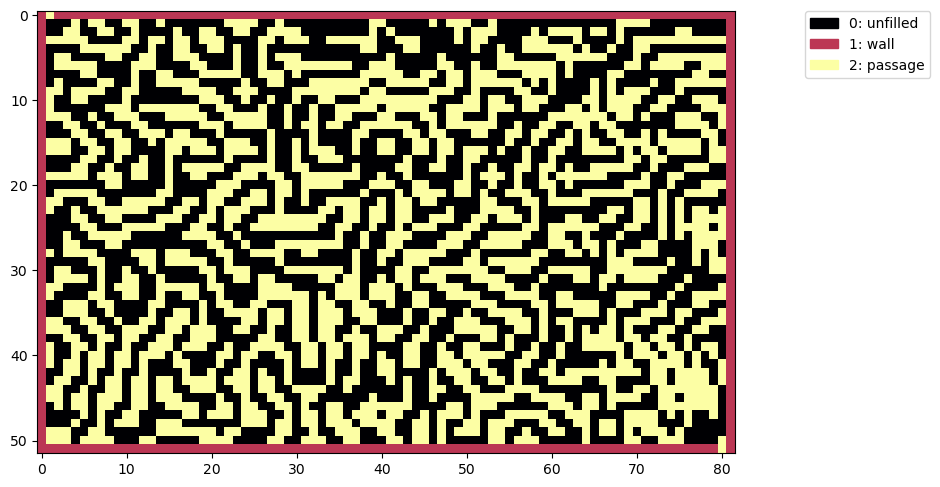

In [12]:
d = box(52, 82)
insert_brain = (binary_brain + 2) % 3
d[1:-1, 1:-1] = insert_brain
show(d)

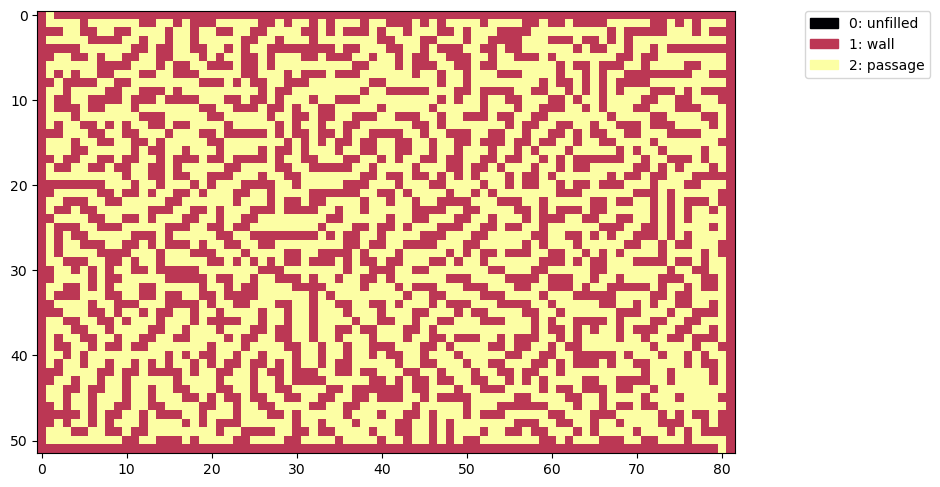

In [13]:
bm = maze(d)
show(bm)

In [15]:
imsave('grid_pattern.png', palette[m])
imsave('brain_pattern.png', palette[d])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


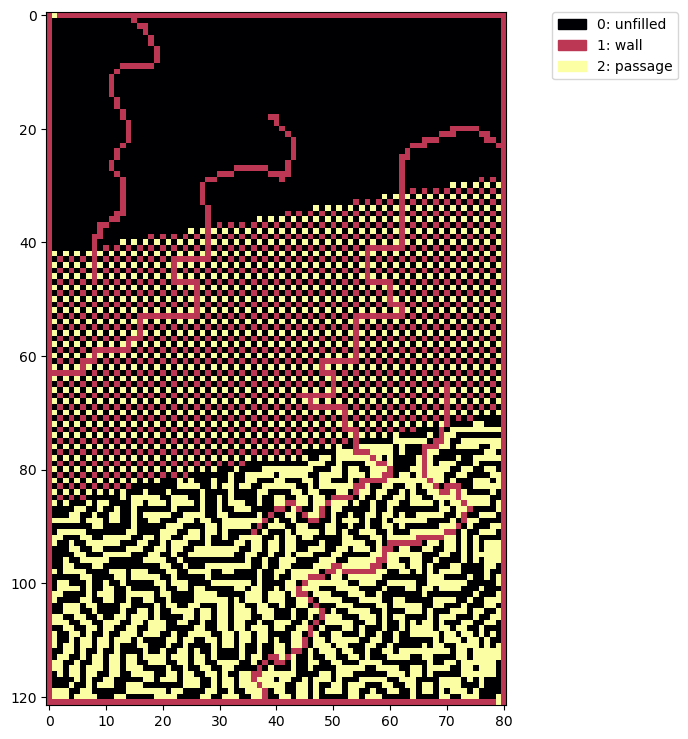

In [17]:
n = imread('combined_pattern.png')
# use red component to convert RGB to 0:unfilled, 1: wall, 2: passage
n = np.array((n[...,0] == 188) + (n[...,0] == 252) * 2, dtype=np.uint8)
show(n)

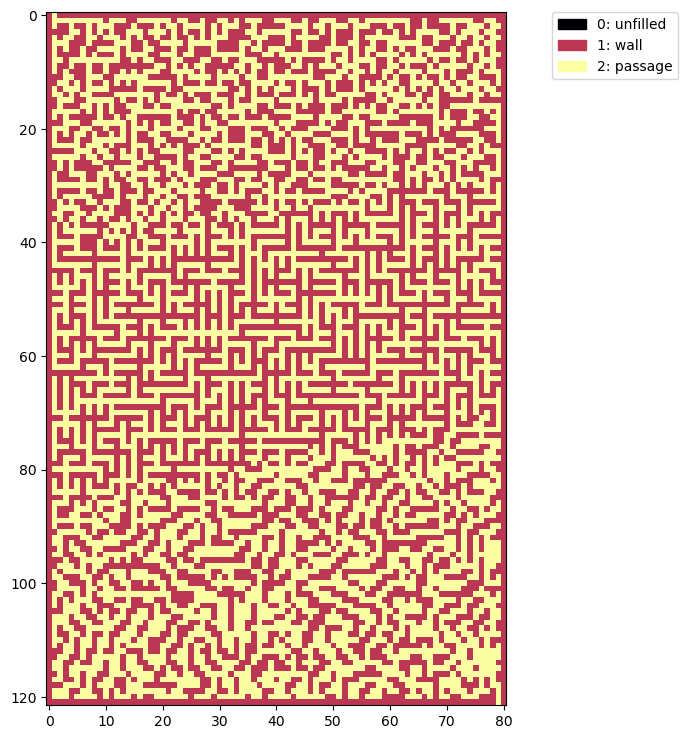

In [19]:
mn = maze(n)
show(mn)

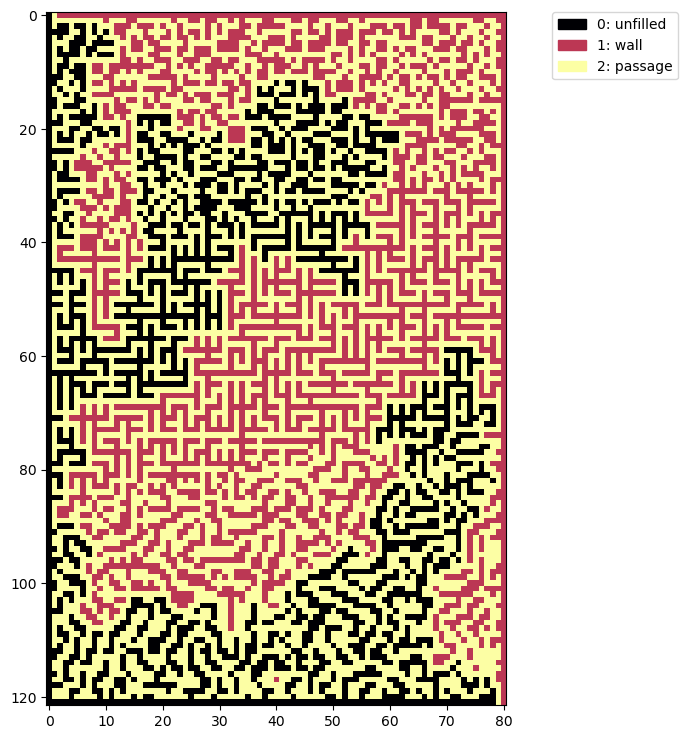

In [20]:
t = flood_fill(mn, (0,0), 0)
show(t)